In [35]:
import numpy as np

In [36]:
# Импортируем библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from math import sin

In [38]:
from math import sqrt

In [39]:
from math import log

In [40]:
# Заданная функция f(x)
def Y(u):
    return u**2 + u + np.sin(u) 

In [41]:
#a = 1 # Начало отрезка [a, b]
a = -1

In [42]:
#b = 2 # Конец отрезка [a, b]
b = 0

In [43]:
delta = ((b - a) / 2) / 10**(15) # Величина дельта

In [44]:
x = np.linspace(a, b, 1000) # Разбиение сетки

In [45]:
# Проверяем, является ли функция выпуклой
def is_vipuklaya(u1, u2, u3) -> bool:
    if Y(u1) - Y(u2) >= 0 and Y(u3) - Y(u2) >= 0 and Y(u1) - 2 * Y(u2) + Y(u3) > 0:
        return True
    return False

In [46]:
u = []

In [47]:
# 1-й и 2-й шаг
u0 = a
u.append(u0)
Y0 = Y(u[0])

u.append(u0 + delta)
Y1 = Y(u[1])

if Y1 <= Y0:
    u.append(u[0] + 2 * delta)
else:
    u[0] = u[0] + delta
    u[1] = u[1] - delta
    u.append(u[0] - 2 * delta)

In [48]:
i = 2
while is_vipuklaya(u[i], u[i-1], u[i-2]) == False:
    if u[i] >= a and u[i] <= b:
        if u[i] > u[i-1]:
            u.append(u[i] + 2**i * delta)
        else:
            u.append(u[i] - 2**i * delta)
    else:
        if u[i] > u[i-1]:
            w = b
        else:
            w = a
        break;    
    i += 1
    
n = i
            
u3 = u[n]
u2 = u[n-1]
u1 = u[n-2]
F1 = Y(u1)
F2 = Y(u2)
F3 = Y(u3)
w = -0.5 * ((F2-F1)*u3**2+(F1-F3)*u2**2+(F3-F2)*u1**2)/((F1-F2)*u3+(F3-F1)*u2+(F2-F3)*u1)

A = [[1, u1, u1**2],[1, u2, u2**2],[1, u3, u3**2]]
B = [F1, F2, F3]

a = np.linalg.solve(A, B)

P = [a[0] + a[1] * u + a[2] * u**2 for u in x]

x_min = round(w, 3)
f_min = round(Y(w), 3)

print(x_min)
print(f_min)

-0.835
-0.879


In [49]:
y = np.array([Y(i) for i in x]) # Значения  исходной функции

In [50]:
points = np.array([Y(i) for i in u]) # Точки метода

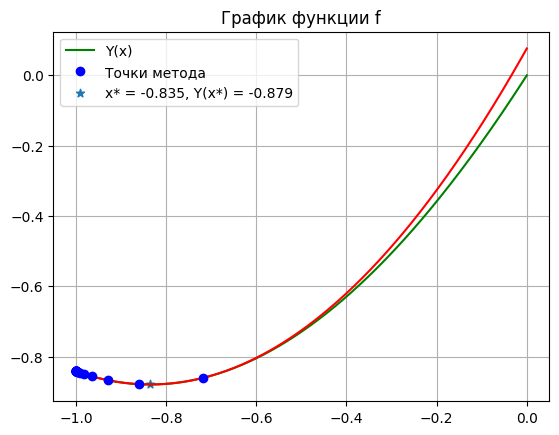

In [51]:
# Построение графика функции f
plt.title("График функции f")
plt.plot(x, y, '-g', label = 'Y(x)')
plt.plot(x, P, '-r')
plt.plot(u, points, 'bo', label = 'Точки метода')
plt.scatter(x_min, f_min, marker='*', label = f"x* = {x_min}, Y(x*) = {f_min}")
plt.grid()
plt.legend()